In [1]:
import minna_functions as mf

In [2]:
import sqlite3
conn = sqlite3.connect('spotify.db')
c = conn.cursor()

In [3]:
c.execute('''DROP TABLE pop_hits''')

Connect to Database:

In [4]:
get_playlist = mf.get_spotify_playlist('BQBRtwFQA_8ERFY2sH3aIMZg6G5u5PMS2cL3u0cdvv5D4ZL9tmJyhvM9gVSa3chHIeH87VVNDinxBSvaUD4zzUZeXzyq8b7D49IrLf0rY3lvj2dNOjS9uU8ted45f48udqzUw1-xAVmalRO9xSQ')

Retrieve data for every playlist we want to look at and put it into SQL table:

In [5]:
get_playlist.get_playlist_SQL('37i9dQZF1DX92MLsP3K1fI', 'pop_hits') 

In [6]:
get_playlist.get_playlist_SQL('5TDtuKDbOhrfW7C58XnriZ', 'pop_hits')

In [7]:
get_playlist.get_playlist_SQL('37i9dQZF1DXcBWIGoYBM5M', 'pop_hits')

In [8]:
get_playlist.get_playlist_SQL('37i9dQZF1DWUa8ZRTfalHk', 'pop_hits')

Convert SQL database to a pandas dataframe:

In [9]:
df = get_playlist.SQL_to_dataframe('pop_hits')

Retrive audio feature information from each song in the playlist: 

In [10]:
df = get_playlist.song_audio_features(df, 'pop_hits')

In [11]:
df.head()

,song_name,song_id,popularity,artist_name,speechiness,danceability
index,,,,,,
1,Sucker,4y3OI86AEP6PQoDE6olYhO,90,Jonas Brothers,0.0588,0.842
2,Never Really Over,5PYQUBXc7NYeI1obMKSJK0,91,Katy Perry,0.0602,0.770
3,Old Town Road - Remix,6u7jPi22kF8CTQ3rb9DHE7,96,Lil Nas X,0.1020,0.878
4,bad guy (with Justin Bieber),3yNZ5r3LKfdmjoS3gkhUCT,80,Billie Eilish,0.2950,0.670
5,I Don't Care (with Justin Bieber),3HVWdVOQ0ZA45FuZGSfvns,98,Ed Sheeran,0.0442,0.798


Analyze the data:

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

Text(0.5, 1.0, 'top pop songs speechiness vs. popularity')

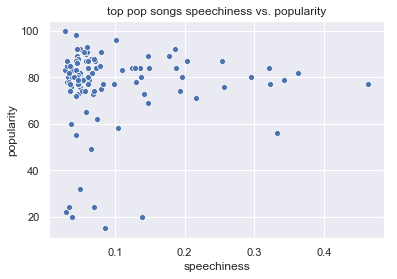

In [14]:
ax = sns.scatterplot(x=df["speechiness"], y=df["popularity"], data = df)
plt.title('top pop songs speechiness vs. popularity')